In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [30]:
# Working on FBI crime dataset, read the dataset
df_crime = pd.read_excel('/Users/Maryam/Desktop/Thinkful/projects/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',
                             skiprows=4, skip_footer=5)


# Do data cleaning
df_crime_clean = df_crime.drop('Rape\n(revised\ndefinition)1', axis=1)
df_crime_clean.columns = df_crime_clean.columns.str.replace('\n',' ')
df_crime_clean = df_crime_clean.rename(columns={'Murder and nonnegligent manslaughter':'Murder',
                              'Rape (legacy definition)2':'Rape',
                              })
dfc = df_crime_clean
dfc = dfc.drop('Arson3', axis=1)
# Remove New York data
dfc = dfc[dfc.City !='New York']

dfc_f = dfc[['Population','Murder','Robbery','Property crime']]
dfc_f['Murder'] = np.where(dfc_f['Murder'] > 0, 1,0)
dfc_f['Robbery'] = np.where(dfc_f['Robbery']>0,1,0)
dfc_f['Pop2'] = dfc_f['Population']**2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [39]:
# OLS regression model
from sklearn.linear_model import LinearRegression

ols_regr = LinearRegression()
X = dfc_f[['Pop2', 'Murder', 'Robbery']]
Y = dfc_f['Property crime']

ols_regr.fit(X,Y)
ols_r = ols_regr.score(X,Y)

In [36]:
# KNN regression model
from sklearn.neighbors import KNeighborsRegressor

knn_regr = KNeighborsRegressor(n_neighbors=3)
X = dfc_f[['Pop2', 'Murder', 'Robbery']]
Y = dfc_f['Property crime']

knn_regr.fit(X,Y)
print(knn_regr.score(X,Y))

0.9275471811876366


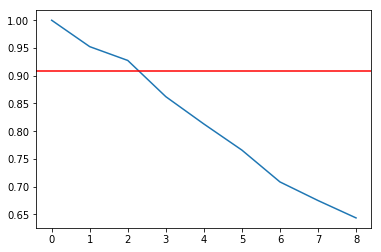

In [42]:
# Compare two models
knn_rval = []

for k in range(1,10):
    knn_regr = KNeighborsRegressor(n_neighbors=k)
    knn_regr.fit(X,Y)
    knn_rval.append(knn_regr.score(X,Y))

plt.plot(knn_rval)
plt.axhline(ols_r, color='red')
plt.show()

Pros & cons:
- Ols is a parametric approach, good when we have small number of observation
- assumption for a linear functional form on the data
